<h1>Parsing and Seperating</h1>

In [2]:
import os
import pandas as pd

In [5]:
source_dir = "DataTest" 
cheater_dir = "nonSegmented_processed/cheater"
non_cheater_dir = "nonSegmented_processed/non_cheater"

os.makedirs(cheater_dir, exist_ok=True)
os.makedirs(non_cheater_dir, exist_ok=True)


In [6]:
cheater_steamid = 76561198822643426

# Verify source directory exists
if not os.path.exists(source_dir):
    raise FileNotFoundError(f"Data directory '{source_dir}' not found. Create it and add CSV files first.")

In [7]:
# Process files
for file_name in os.listdir(source_dir):
    if file_name.endswith('.csv'):
        file_path = os.path.join(source_dir, file_name)
        
        try:
            df = pd.read_csv(file_path)
            
            # Remove 'name' column if present
            if 'name' in df.columns:
                df = df.drop('name', axis=1)
            
            # Check for cheater steamid presence
            if cheater_steamid in df['steamid'].values:
                target_path = os.path.join(cheater_dir, file_name)
            else:
                target_path = os.path.join(non_cheater_dir, file_name)
            
            # Save processed CSV
            df.to_csv(target_path, index=False)
            print(f"Processed: {file_name}")
            
        except Exception as e:
            print(f"Error processing {file_name}: {str(e)}")

print("Processing complete. Files saved to:")
print(f"- Cheaters: {cheater_dir}")
print(f"- Legit players: {non_cheater_dir}")


Processed: subdf_tick_50596_to_50896_attacker_76561199469944110.csv
Processed: subdf_tick_36613_to_36913_attacker_76561199469944110.csv
Processed: subdf_tick_59508_to_59808_attacker_76561198822643426.csv
Processed: subdf_tick_58984_to_59284_attacker_76561198822643426.csv
Processed: subdf_tick_2314_to_2614_attacker_76561199469944110.csv
Processed: subdf_tick_7398_to_7698_attacker_76561199479902304.csv
Processed: subdf_tick_56241_to_56541_attacker_76561199039565051.csv
Processed: subdf_tick_11928_to_12228_attacker_76561198312099217.csv
Processed: subdf_tick_8143_to_8443_attacker_76561198389634571.csv
Processed: subdf_tick_17679_to_17979_attacker_76561198822643426.csv
Processed: subdf_tick_7876_to_8176_attacker_76561198822643426.csv
Processed: subdf_tick_7552_to_7852_attacker_76561198389634571.csv
Processed: subdf_tick_26160_to_26460_attacker_76561198822643426.csv
Processed: subdf_tick_36818_to_37118_attacker_76561199470374288.csv
Processed: subdf_tick_13108_to_13408_attacker_765611997805

<h1>Feature Engineering</h1>

In [8]:
import os
import pandas as pd
import numpy as np

In [12]:
def engineer_features(df):
    # Calculate velocities
    df['pitch_velocity'] = df['pitch'].diff() / df['tick'].diff()
    df['yaw_velocity'] = df['yaw'].diff() / df['tick'].diff()
    
    # Calculate accelerations
    df['pitch_acceleration'] = df['pitch_velocity'].diff() / df['tick'].diff()
    df['yaw_acceleration'] = df['yaw_velocity'].diff() / df['tick'].diff()
    
    # Calculate jerk (rate of change of acceleration)
    df['pitch_jerk'] = df['pitch_acceleration'].diff() / df['tick'].diff()
    df['yaw_jerk'] = df['yaw_acceleration'].diff() / df['tick'].diff()
    
    # Calculate cumulative angular displacement
    df['cumulative_pitch'] = df['pitch'].cumsum()
    df['cumulative_yaw'] = df['yaw'].cumsum()
    
    # Statistical features per segment
    for col in ['pitch', 'yaw']:
        df[f'{col}_mean'] = df[col].mean()
        df[f'{col}_std'] = df[col].std()
        df[f'{col}_min'] = df[col].min()
        df[f'{col}_max'] = df[col].max()
        df[f'{col}_range'] = df[f'{col}_max'] - df[f'{col}_min']
    
    return df.dropna()

In [13]:
# Directory setup
base_dir = "nonSegmented_processed"
categories = ["cheater", "non_cheater"]
engineered_dir = "nonSegmented_processed/engineered_data"

# Create engineered data directories
os.makedirs(engineered_dir, exist_ok=True)
for category in categories:
    os.makedirs(os.path.join(engineered_dir, category), exist_ok=True)

# Process each category
for category in categories:
    category_path = os.path.join(base_dir, category)
    
    for file in os.listdir(category_path):
        if file.endswith('.csv'):
            input_path = os.path.join(category_path, file)
            output_path = os.path.join(engineered_dir, category, f"engineered_{file}")
            
            # Read and process
            df = pd.read_csv(input_path)
            engineered_df = engineer_features(df)
            
            # Save with category preservation
            engineered_df.to_csv(output_path, index=False)
            print(f"Processed: {category}/{file}")

print("Feature engineering completed with category preservation.")

Processed: cheater/subdf_tick_59508_to_59808_attacker_76561198822643426.csv
Processed: cheater/subdf_tick_58984_to_59284_attacker_76561198822643426.csv
Processed: cheater/subdf_tick_17679_to_17979_attacker_76561198822643426.csv
Processed: cheater/subdf_tick_7876_to_8176_attacker_76561198822643426.csv
Processed: cheater/subdf_tick_26160_to_26460_attacker_76561198822643426.csv
Processed: cheater/subdf_tick_46603_to_46903_attacker_76561198822643426.csv
Processed: cheater/subdf_tick_31909_to_32209_attacker_76561198822643426.csv
Processed: cheater/subdf_tick_61632_to_61932_attacker_76561198822643426.csv
Processed: cheater/subdf_tick_8301_to_8601_attacker_76561198822643426.csv
Processed: cheater/subdf_tick_22887_to_23187_attacker_76561198822643426.csv
Processed: cheater/subdf_tick_62021_to_62321_attacker_76561198822643426.csv
Processed: cheater/subdf_tick_31291_to_31591_attacker_76561198822643426.csv
Processed: cheater/subdf_tick_45315_to_45615_attacker_76561198822643426.csv
Processed: cheat

<h1>Visualization</h1>

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
CHEATER_DIR = "nonSegmented_processed/engineered_data/cheater"
NON_CHEATER_DIR = "nonSegmented_processed/engineered_data/non_cheater"
os.makedirs(CHEATER_DIR, exist_ok=True)
os.makedirs(NON_CHEATER_DIR, exist_ok=True)

In [26]:
def load_data(directory):
    dfs = []
    try:
        for file in os.listdir(directory):
            if file.endswith('.csv'):
                df = pd.read_csv(os.path.join(directory, file))
                dfs.append(df)
        return pd.concat(dfs, ignore_index=True)
    except FileNotFoundError:
        print(f"Directory {directory} not found. Creating empty DataFrame.")
        return pd.DataFrame()

In [27]:
cheater_df = load_data(CHEATER_DIR)
non_cheater_df = load_data(NON_CHEATER_DIR)

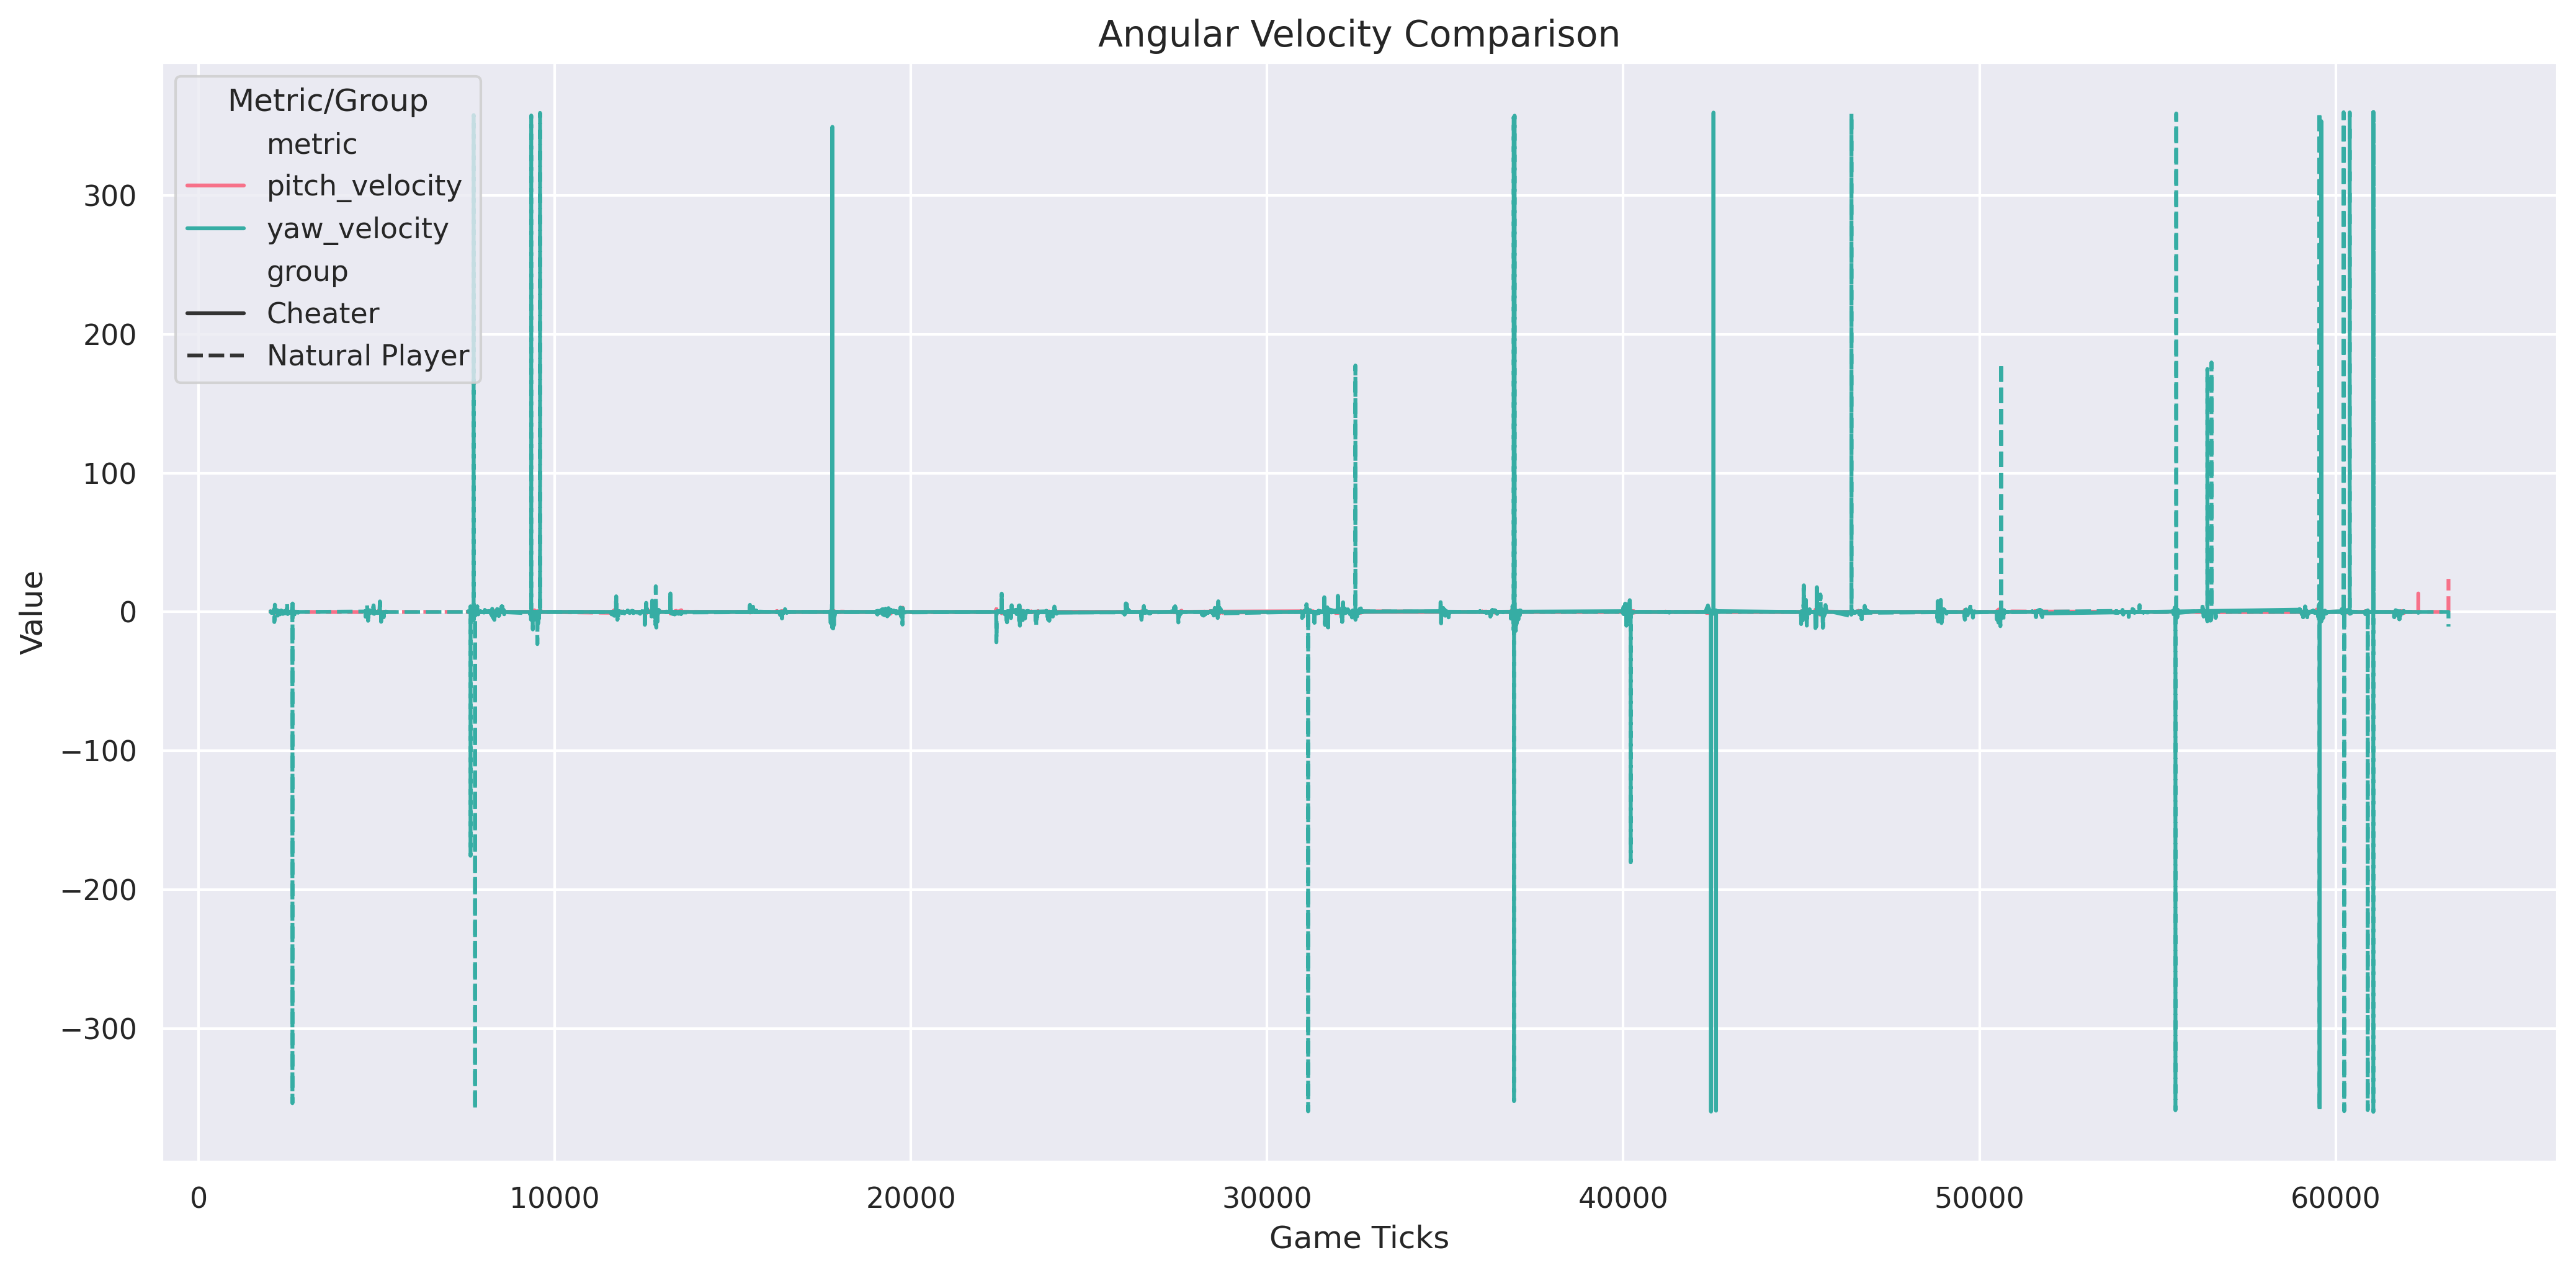

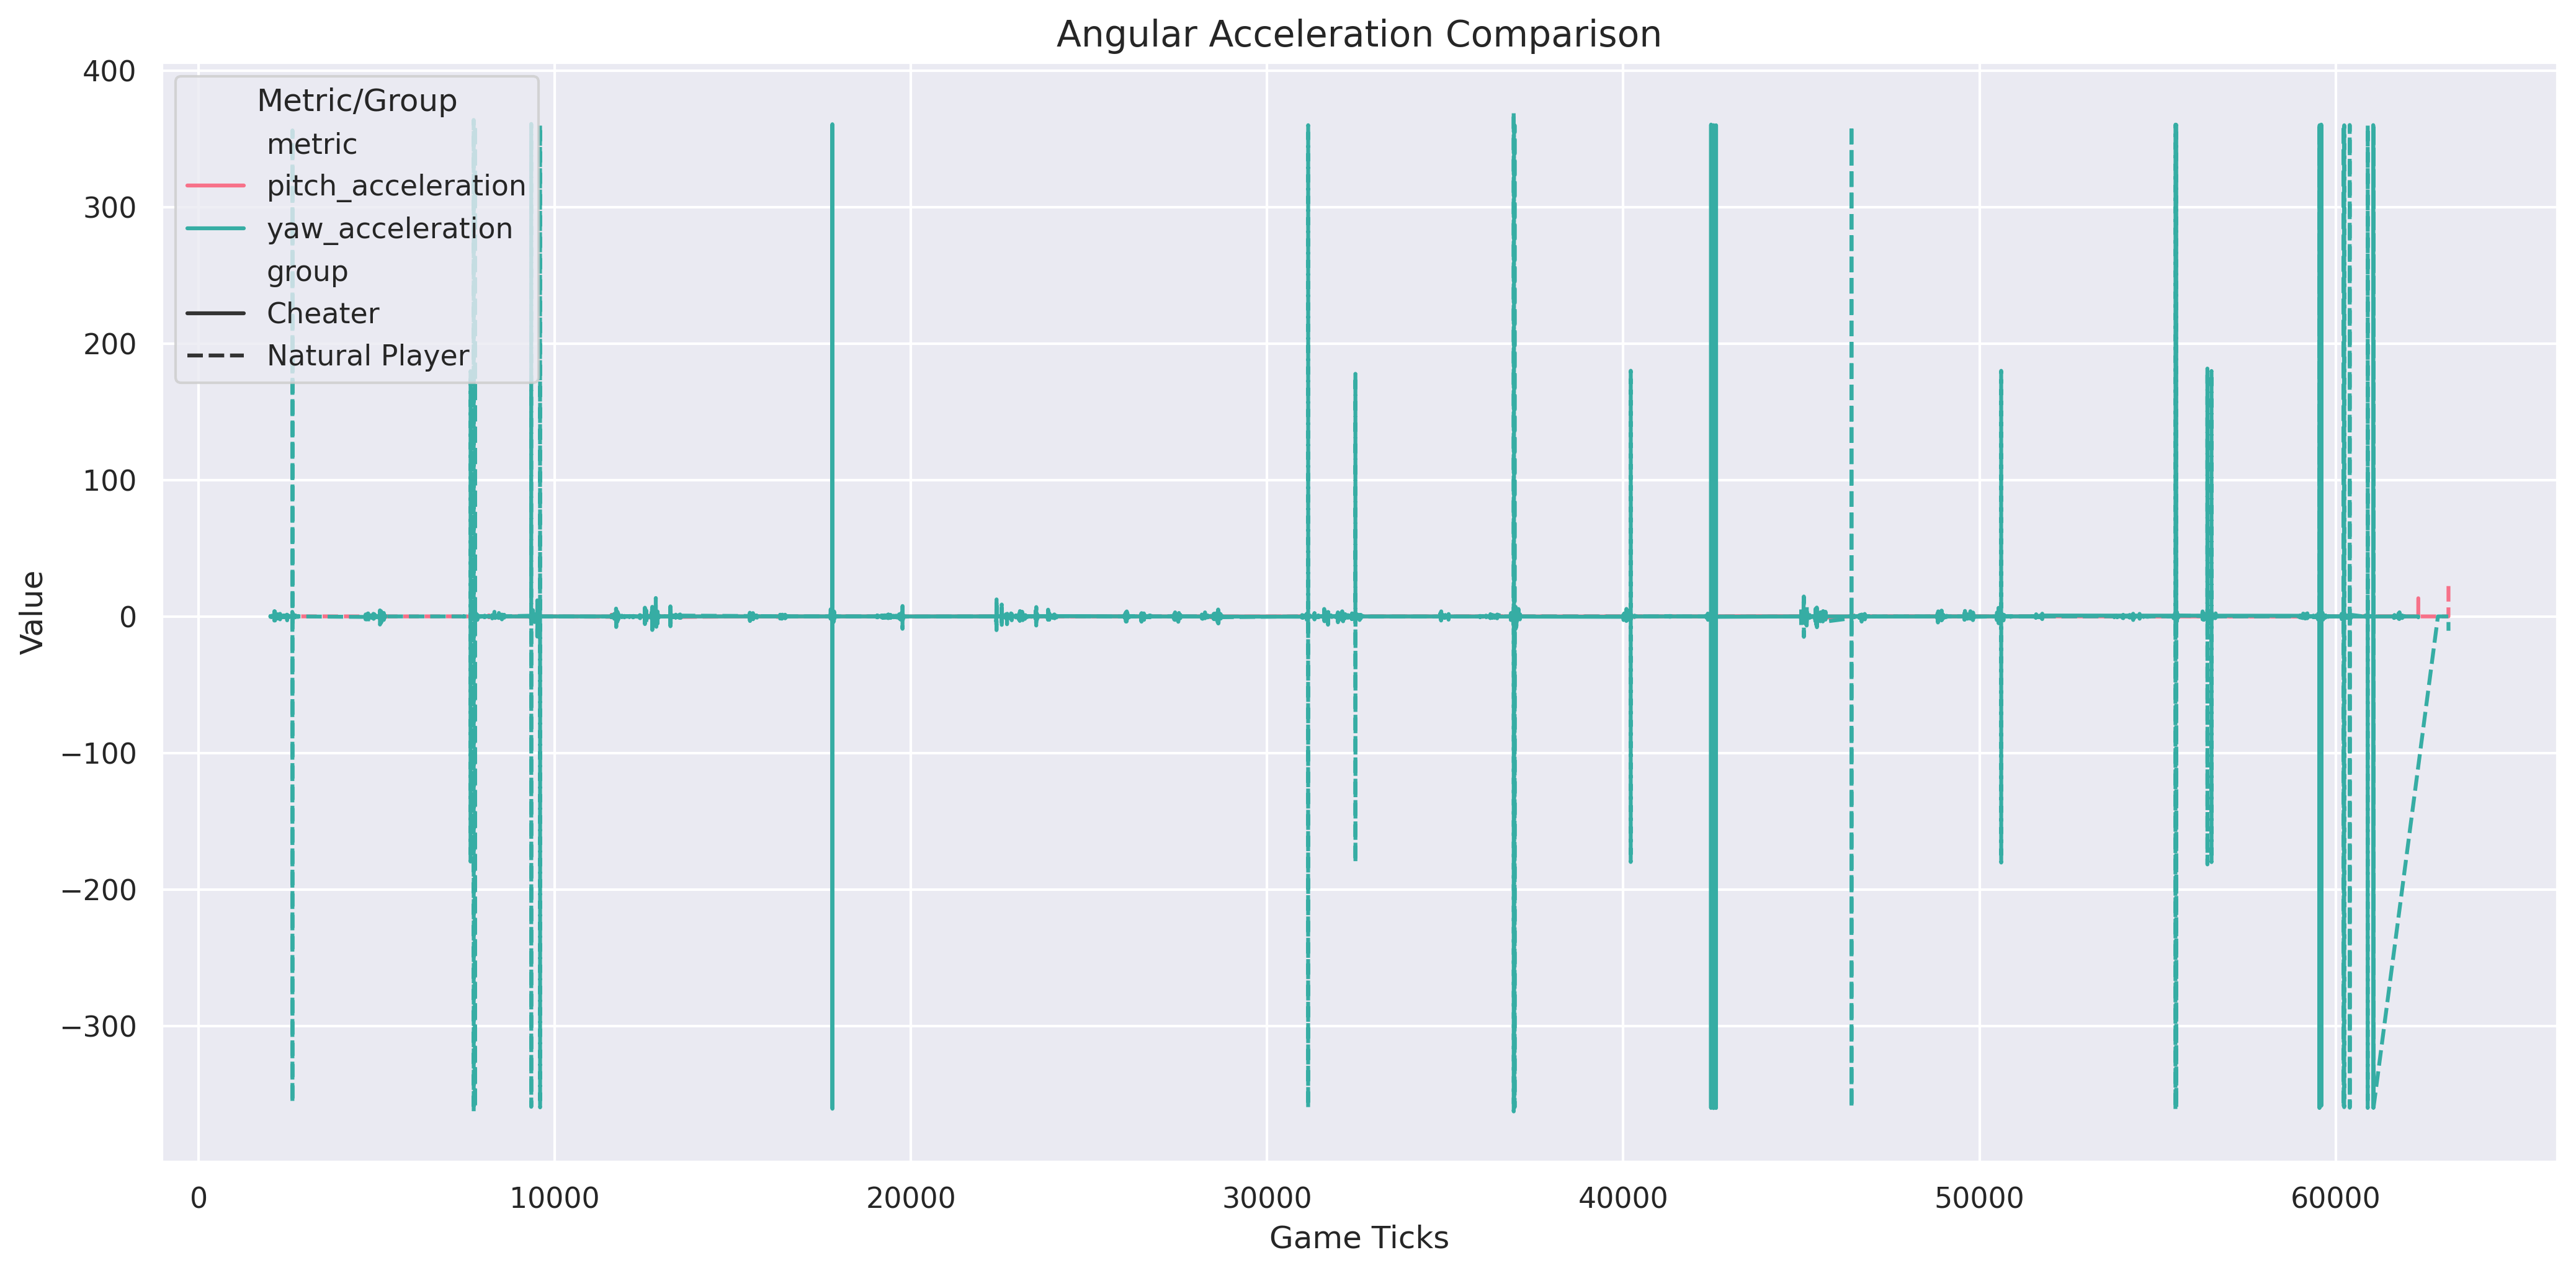

In [29]:
# Set visual style
sns.set_theme(style="darkgrid")
plt.rcParams['figure.dpi'] = 300
colors = sns.color_palette("husl", 4)

# Create comparison plots
def create_comparison_plot(features, title):
    plt.figure(figsize=(14, 7))
    
    # Prepare data
    plot_data = []
    
    # Process cheater data
    if not cheater_df.empty:
        cheater_avg = cheater_df.groupby('tick')[features].mean().reset_index()
        cheater_avg = cheater_avg.melt(id_vars='tick', value_vars=features, 
                                      var_name='metric', value_name='value')
        cheater_avg['group'] = 'Cheater'
        plot_data.append(cheater_avg)
    
    # Process non-cheater data
    if not non_cheater_df.empty:
        non_cheater_avg = non_cheater_df.groupby('tick')[features].mean().reset_index()
        non_cheater_avg = non_cheater_avg.melt(id_vars='tick', value_vars=features,
                                              var_name='metric', value_name='value')
        non_cheater_avg['group'] = 'Natural Player'
        plot_data.append(non_cheater_avg)
    
    if not plot_data:
        print("No data to plot")
        return
    
    combined_df = pd.concat(plot_data)
    
    # Create plot
    sns.lineplot(
        data=combined_df,
        x='tick',
        y='value',
        hue='metric',
        style='group',
        palette='husl',
        linewidth=1.5
    )
    
    plt.title(f"{title} Comparison", fontsize=14)
    plt.xlabel('Game Ticks', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(title='Metric/Group')
    plt.tight_layout()
    plt.show()

# Create velocity comparison plot
create_comparison_plot(['pitch_velocity', 'yaw_velocity'], 'Angular Velocity')

# Create acceleration comparison plot
create_comparison_plot(['pitch_acceleration', 'yaw_acceleration'], 'Angular Acceleration')


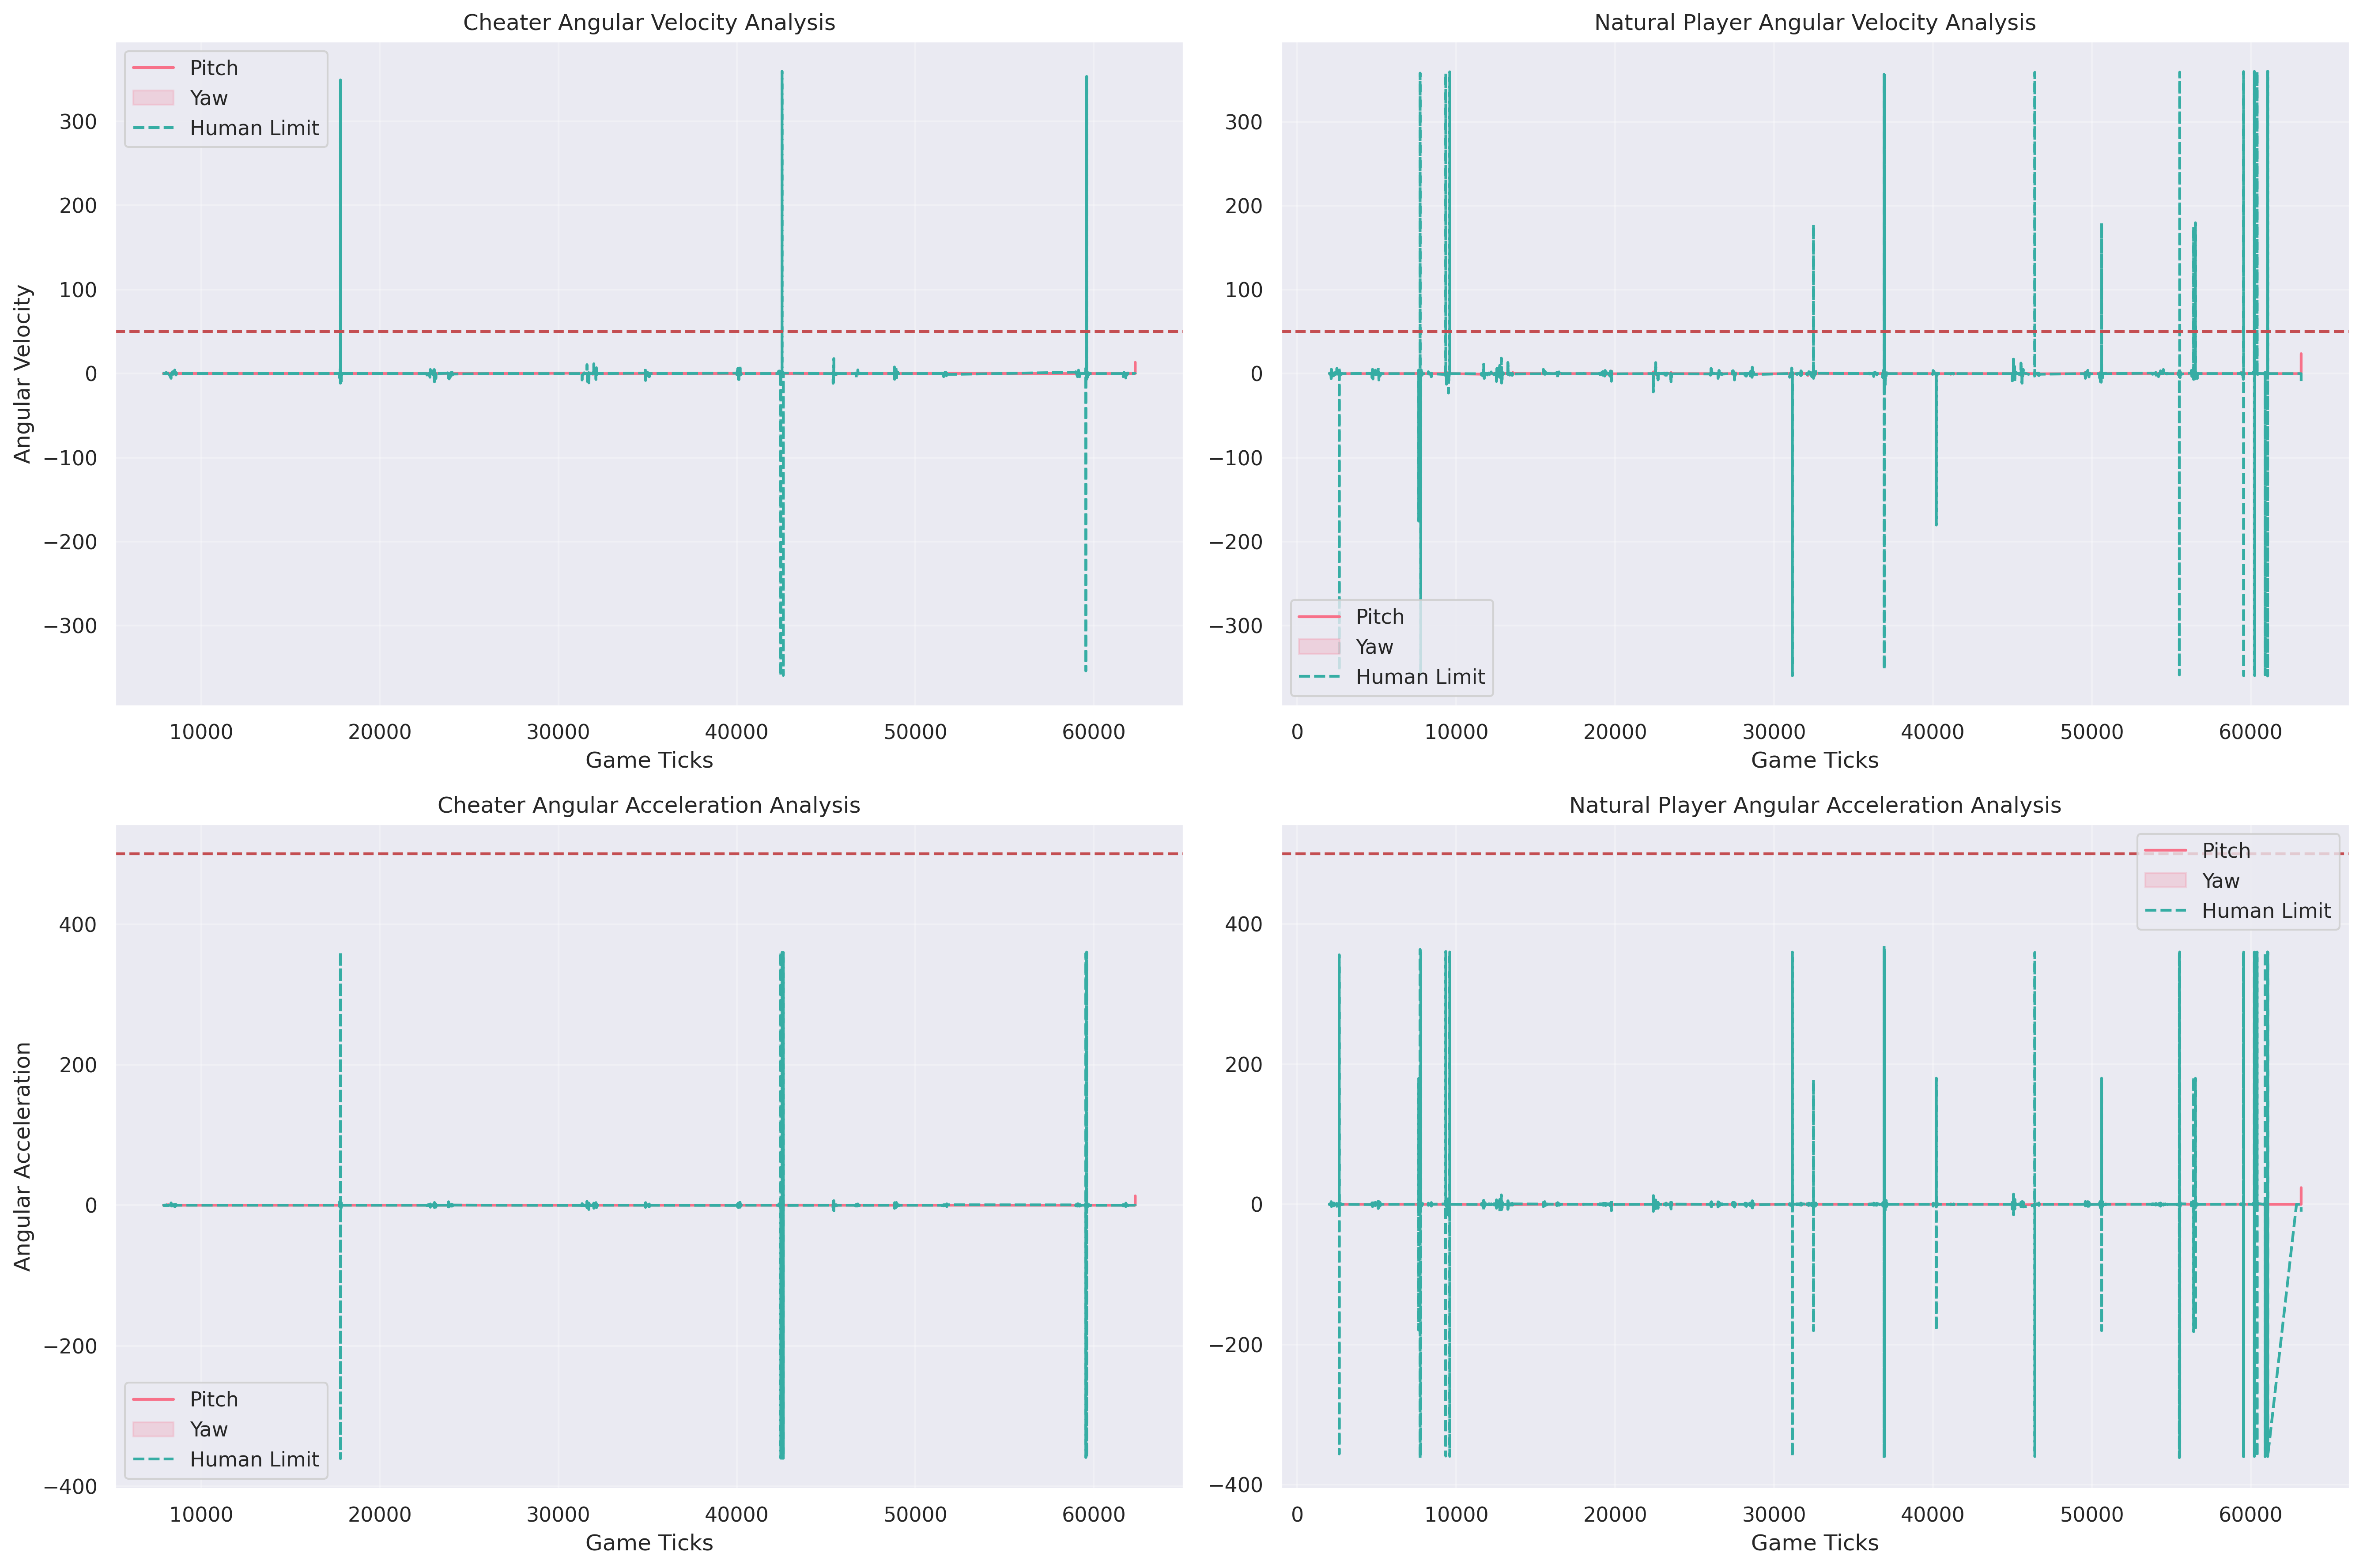

In [30]:
def create_separate_comparisons(metrics, titles):
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))
    axes = axs.flatten()
    
    # Human performance thresholds from research
    HUMAN_VELOCITY_LIMIT = 50  # degrees/tick
    HUMAN_ACCEL_LIMIT = 500    # degrees/tick²
    
    for i, (metric_type, metric_names) in enumerate(metrics.items()):
        # Cheater plots
        if not cheater_df.empty:
            cheater_avg = cheater_df.groupby('tick')[metric_names].mean()
            sns.lineplot(data=cheater_avg, ax=axes[i*2], 
                        palette='husl', linewidth=1.5)
            axes[i*2].axhline(HUMAN_VELOCITY_LIMIT if 'velocity' in metric_type else HUMAN_ACCEL_LIMIT, 
                             color='r', linestyle='--', label='Human Limit')
            axes[i*2].set_title(f'Cheater {titles[i]}')
            axes[i*2].set_ylabel(metric_type.replace('_', ' ').title())
            axes[i*2].legend(['Pitch', 'Yaw', 'Human Limit'])
        
        # Non-cheater plots
        if not non_cheater_df.empty:
            non_cheater_avg = non_cheater_df.groupby('tick')[metric_names].mean()
            sns.lineplot(data=non_cheater_avg, ax=axes[i*2+1], 
                        palette='husl', linewidth=1.5)
            axes[i*2+1].axhline(HUMAN_VELOCITY_LIMIT if 'velocity' in metric_type else HUMAN_ACCEL_LIMIT, 
                               color='r', linestyle='--', label='Human Limit')
            axes[i*2+1].set_title(f'Natural Player {titles[i]}')
            axes[i*2+1].legend(['Pitch', 'Yaw', 'Human Limit'])
    
    for ax in axes:
        ax.set_xlabel('Game Ticks')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Configure metrics and titles
metrics = {
    'angular_velocity': ['pitch_velocity', 'yaw_velocity'],
    'angular_acceleration': ['pitch_acceleration', 'yaw_acceleration']
}

titles = ['Angular Velocity Analysis', 'Angular Acceleration Analysis']

create_separate_comparisons(metrics, titles)


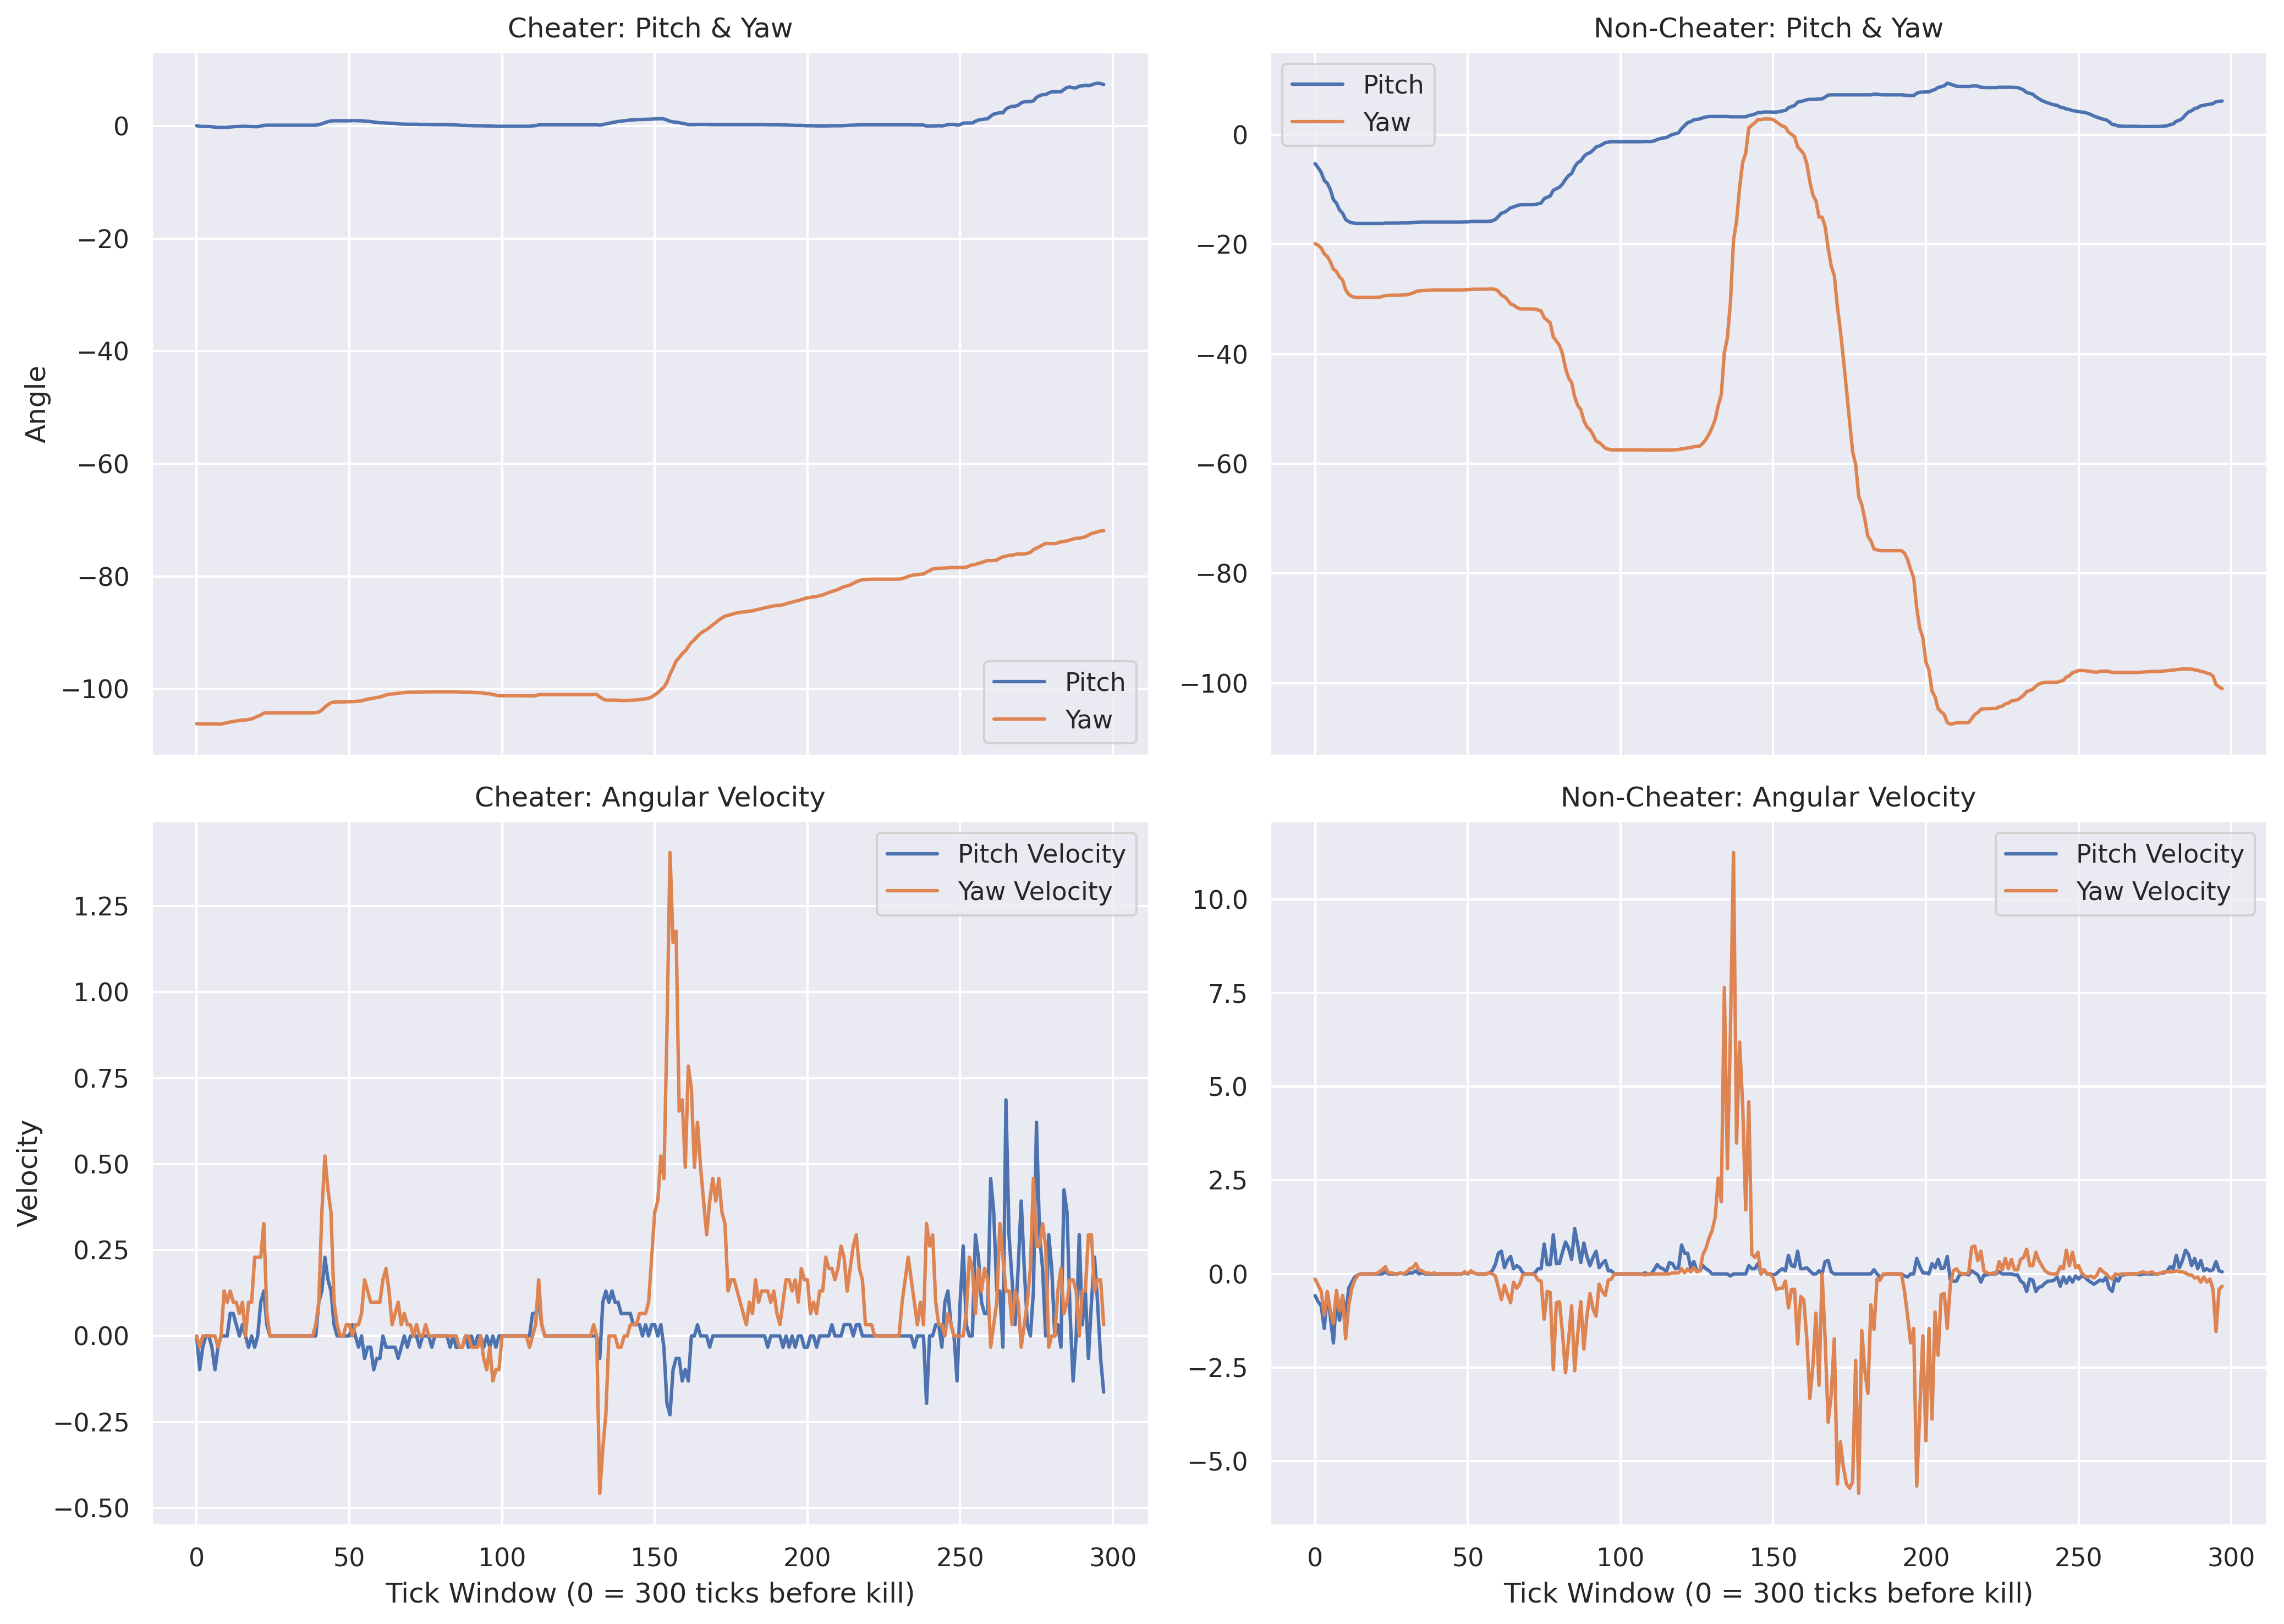

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load one engineered CSV for each
cheater_file = 'nonSegmented_processed/engineered_data/cheater/engineered_subdf_tick_7876_to_8176_attacker_76561198822643426.csv'
non_cheater_file = 'nonSegmented_processed/engineered_data/non_cheater/engineered_subdf_tick_11583_to_11883_attacker_76561199470374288.csv'

cheater_df = pd.read_csv(cheater_file).reset_index(drop=True)
noncheater_df = pd.read_csv(non_cheater_file).reset_index(drop=True)

# Create a 0-300 x-axis (or up to the length of your data)
cheater_x = cheater_df.index
noncheater_x = noncheater_df.index

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Cheater Pitch/Yaw
axs[0,0].plot(cheater_x, cheater_df['pitch'], label='Pitch')
axs[0,0].plot(cheater_x, cheater_df['yaw'], label='Yaw')
axs[0,0].set_title('Cheater: Pitch & Yaw')
axs[0,0].set_ylabel('Angle')
axs[0,0].legend()

# Non-cheater Pitch/Yaw
axs[0,1].plot(noncheater_x, noncheater_df['pitch'], label='Pitch')
axs[0,1].plot(noncheater_x, noncheater_df['yaw'], label='Yaw')
axs[0,1].set_title('Non-Cheater: Pitch & Yaw')
axs[0,1].legend()

# Cheater Velocity
axs[1,0].plot(cheater_x, cheater_df['pitch_velocity'], label='Pitch Velocity')
axs[1,0].plot(cheater_x, cheater_df['yaw_velocity'], label='Yaw Velocity')
axs[1,0].set_title('Cheater: Angular Velocity')
axs[1,0].set_xlabel('Tick Window (0 = 300 ticks before kill)')
axs[1,0].set_ylabel('Velocity')
axs[1,0].legend()

# Non-cheater Velocity
axs[1,1].plot(noncheater_x, noncheater_df['pitch_velocity'], label='Pitch Velocity')
axs[1,1].plot(noncheater_x, noncheater_df['yaw_velocity'], label='Yaw Velocity')
axs[1,1].set_title('Non-Cheater: Angular Velocity')
axs[1,1].set_xlabel('Tick Window (0 = 300 ticks before kill)')
axs[1,1].legend()

plt.tight_layout()
plt.show()

